<a href="https://colab.research.google.com/github/shayantalukdar18/MINI-PROJECT/blob/main/MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CODE TO CLASSIFY BETWEEN DIFFERENT IMAGES OF AIRCRAFTS AND SHIPS

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 202 µs (started: 2021-05-23 06:16:29 +00:00)


aircraft 1.jpg


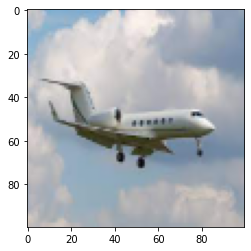

aircraft 2.jpg


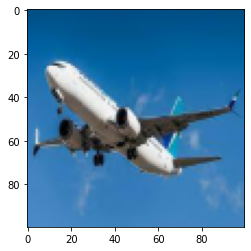

aircraft 3.jpg


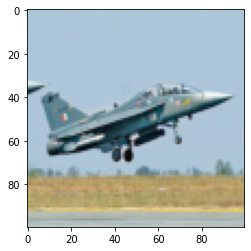

aircraft 4.jpg


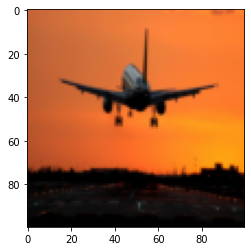

aircraft 5.jpg


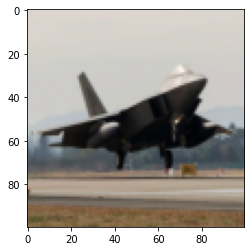

aircraft 6.jpg


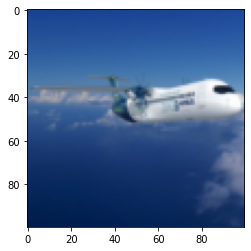

aircraft 7.jpg


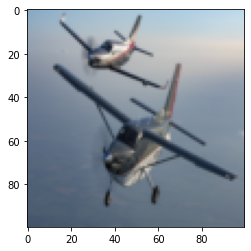

aircraft 8.jpg


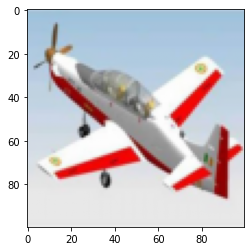

aircraft 9.jpg


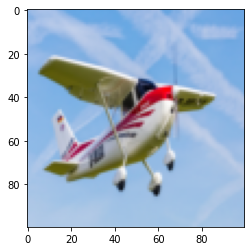

aircraft 10.jpg


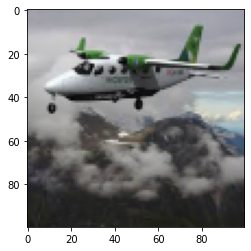

aircraft 11.jpg


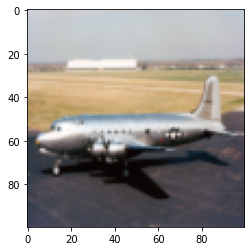

aircraft 12.jpg


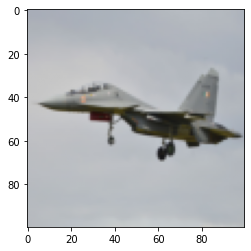

aircraft 13.jpg


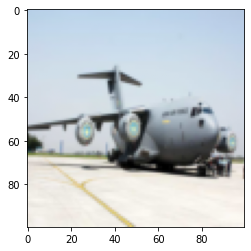

aircraft 14.jpg


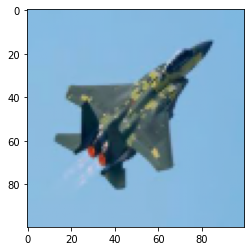

aircraft 15.jpg


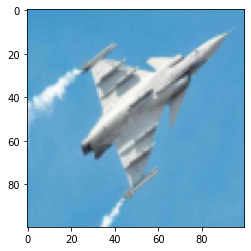

aircraft 16.jpg


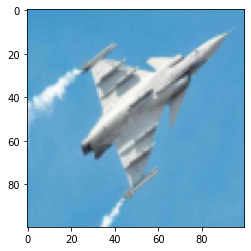

aircraft 17.jpg


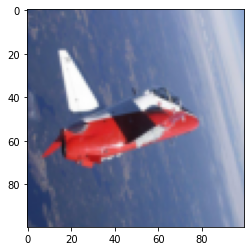

aircraft 18.jpg


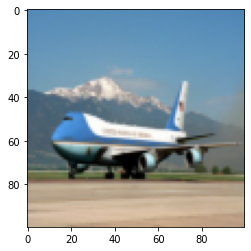

aircraft 19.jpeg


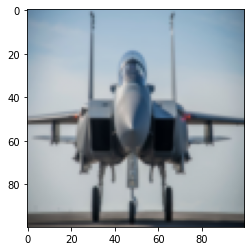

aircraft 20.jpg


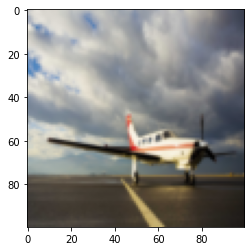

ship 1.jpg


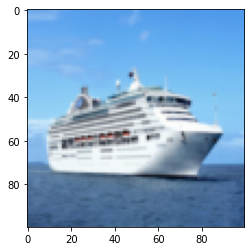

ship 2.jpg


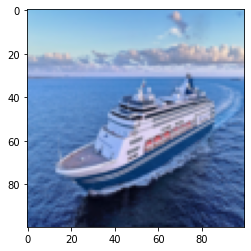

ship 3.jpeg


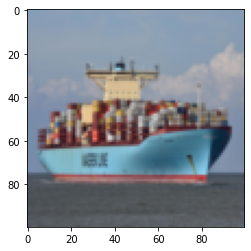

ship 4.jpg


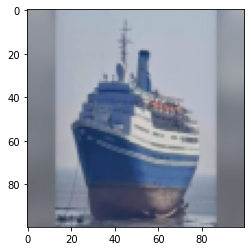

ship 5.jpg


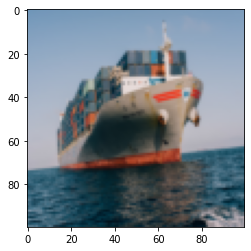

ship 6.jpg


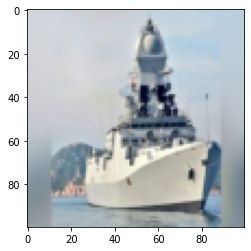

ship 7.jpg


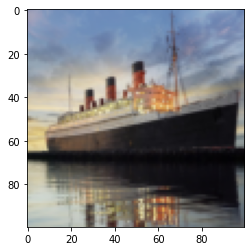

ship 8.jpg


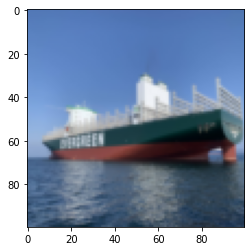

ship 9.jpg


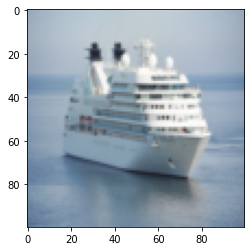

ship 10.jpeg


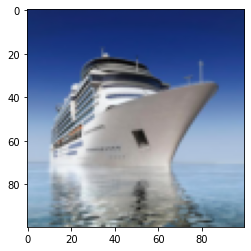

ship 11.jpg


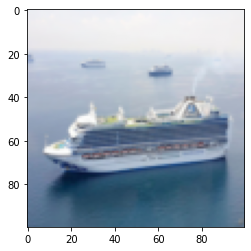

ship 12.jpg


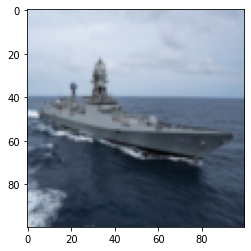

ship 13.jpg


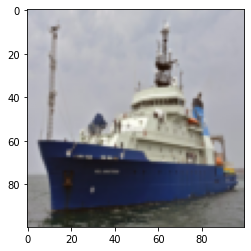

ship 14.jpg


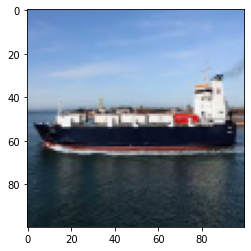

ship 15.jpg


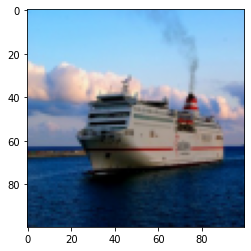

ship 16.jpg


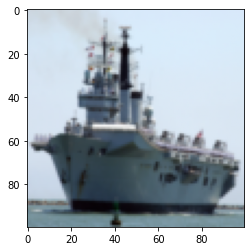

ship 17.jpg


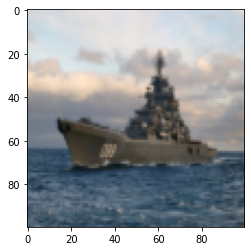

ship 18.jpg


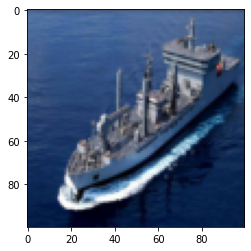

ship 19.jpg


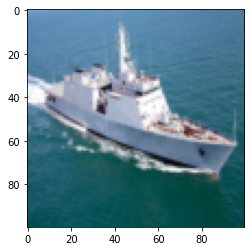

ship 20.jpg


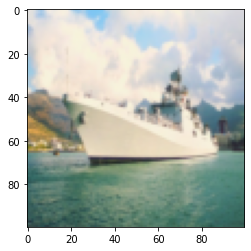

time: 19.2 s (started: 2021-05-23 06:16:29 +00:00)


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

DATADIR = '/content/drive/MyDrive/PYTHON-APRIL/IMAGESMP'

CATEGORIES = ['AIRCRAFTS','SHIPS'] 
target = []
images = []
flat_data = []

for i in CATEGORIES:
  class_num= CATEGORIES.index(i)
  path = os.path.join(DATADIR,i)
  
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))
    img_resize = resize(img_array,(100,100,3))
    flat_data.append(np.ndarray.flatten(img_resize))
    images.append(img_resize)
    target.append(class_num)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
print(img_array)

[[[211 213 228]
  [209 211 226]
  [210 212 225]
  ...
  [218 216 221]
  [218 216 219]
  [218 216 219]]

 [[208 210 225]
  [208 210 223]
  [211 213 225]
  ...
  [218 216 221]
  [218 216 219]
  [218 216 219]]

 [[206 208 221]
  [208 210 222]
  [212 215 224]
  ...
  [218 216 221]
  [218 216 219]
  [218 216 219]]

 ...

 [[ 34  68  54]
  [ 31  63  52]
  [ 40  70  62]
  ...
  [ 61 104  87]
  [ 64 107  90]
  [ 46  89  72]]

 [[ 71 105  91]
  [ 61  93  82]
  [ 60  90  82]
  ...
  [ 45  88  71]
  [ 48  91  74]
  [ 31  74  57]]

 [[ 88 122 108]
  [ 76 108  97]
  [ 69  99  91]
  ...
  [ 39  82  65]
  [ 42  85  68]
  [ 25  68  51]]]
time: 6.42 ms (started: 2021-05-23 06:16:48 +00:00)


In [ ]:
len(flat_data[0])

30000

time: 9.83 ms (started: 2021-05-23 06:16:48 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 9.22 ms (started: 2021-05-23 06:16:48 +00:00)


<BarContainer object of 2 artists>

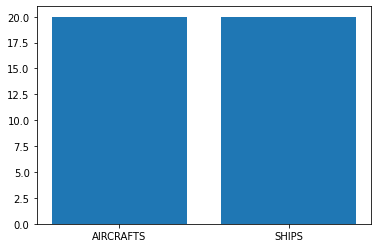

time: 140 ms (started: 2021-05-23 06:16:48 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES, count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 45.9 ms (started: 2021-05-23 06:16:49 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
           ]

svc= svm.SVC(probability=True)
df= GridSearchCV(svc,param_grid)
df.fit(x_train,y_train)           

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 7.44 s (started: 2021-05-23 06:16:49 +00:00)


In [ ]:
y_pred= df.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

time: 20.3 ms (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

time: 3.3 ms (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

time: 1.16 ms (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
accuracy_score(y_pred, y_test)

0.5833333333333334

time: 11 ms (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
confusion_matrix(y_pred, y_test)

array([[4, 3],
       [2, 3]])

time: 3.62 ms (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.50      0.60      0.55         5

    accuracy                           0.58        12
   macro avg       0.58      0.59      0.58        12
weighted avg       0.60      0.58      0.59        12

time: 17.1 ms (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
import pickle
pickle.dump(df, open('minor_model.p','wb'))
model= pickle.load(open('minor_model.p','rb'))

time: 19.4 ms (started: 2021-05-23 06:16:56 +00:00)


Enter your link/content/testimage1.jpg
(549, 976, 3)
PREDICTED RESULT:SHIPS


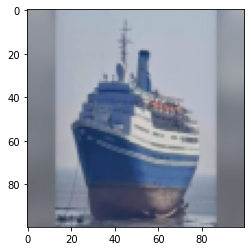

time: 37.5 s (started: 2021-05-23 06:16:56 +00:00)


In [ ]:
flat_data=[]
link= input('Enter your link')
img= imread(link)
img_resize= resize(img,(100,100,3))
flat_data.append(img_resize.flatten())
flat_data= np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_op= model.predict(flat_data)
y_op= CATEGORIES[y_op[0]]
print (f'PREDICTED RESULT:{y_op}')

In [ ]:
#DEPLOYMENT

time: 2.34 ms (started: 2021-05-23 06:17:34 +00:00)


In [ ]:
!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok


time: 5.28 s (started: 2021-05-23 06:17:34 +00:00)


In [ ]:
%%writefile app.py 
import sreamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('IMAGE CLASSIFICATION MODEL')
st.text('UPLOAD FILE/IMAGE')

model = pickle.load(open('minor_model.p','rb'))

uploaded_file = st.file_uploader('CHOOSE AN IMAGE:',type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption= 'UPLOADED IMAGE')

  if st.button('PREDICT'):
    CATEGORIES = ['AIRCRAFTS','SHIPS'] 
    st.write('RESULT:')
    flat_data=[]
    img = np.array(img)
    img_resize= resize(img,(100,100,3))
    flat_data.append(img_resize.flatten())
    flat_data= np.array(flat_data)
    y_op= model.predict(flat_data)
    y_op= CATEGORIES[y_op[0]]
    st.title (f'PREDICTED RESULT:{y_op}')
    q= model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')


Overwriting app.py
time: 2.51 ms (started: 2021-05-23 06:17:39 +00:00)


In [ ]:
!nohup streamlit run app.py &
url= ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://4023cff31b53.ngrok.io'

time: 298 ms (started: 2021-05-23 06:17:39 +00:00)
